In [65]:
%load_ext autoreload
%autoreload 2

# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import sys
from torchvision import datasets, transforms
from tqdm import tqdm
from scipy.spatial.distance import euclidean

# import the project root
sys.path.insert(0, '../..')
from src.covertree import CoverTree 
from src.dyadictree import DyadicTree
from src.wavelettree import WaveletTree
from src.utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
def load_dataset(flatten=False):
    num_points = 100
    transform = transforms.Compose([
        transforms.ToTensor()
    ])

    cifar10_train = datasets.MNIST(root='../../datasets', train=True, download=True, transform=transform)
    X = np.stack([np.array(img[0].numpy()) for img in cifar10_train][:num_points])  # shape: (1000, 3, 32, 32)

    original_shape = X.shape
    if flatten:
        X = X.reshape(X.shape[0], -1)
    # print(X.shape)
    return X, original_shape    

X, original_shape = load_dataset(flatten=True)
p_n_points = X.shape[0]
print("X shape: %s" % str(X.shape))
print(p_n_points)


X shape: (100, 784)
100


In [67]:
python_covertree =  CoverTree(X, euclidean, leafsize=1)
mydiadic_tree    =  DyadicTree(python_covertree)

In [68]:
# print(mydiadic_tree.height)# mydiadic_tree.grow_tree()

In [69]:
# wavelet_tree.j_k_to_wavelet_node

In [70]:
# mydiadic_tree.plot_tree()

In [71]:
mydiadic_tree.grow_tree()


In [72]:
mydiadic_tree.grow_tree()

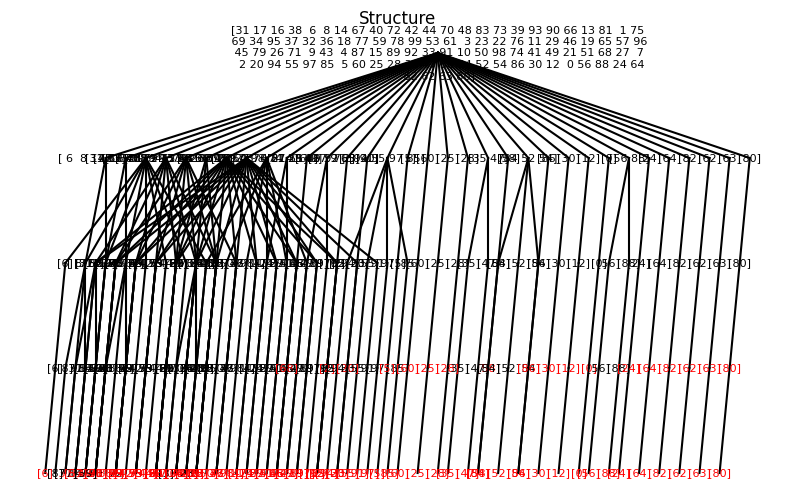

In [73]:
mydiadic_tree.plot_tree()

In [74]:
# mydiadic_tree.idx_to_leaf_node[19]
from scipy.spatial.distance import euclidean
wavelet_tree = WaveletTree(mydiadic_tree, X, 0, X.shape[-1], inverse=True,
                            thresholds=0.0) # inverse means data in (n,d) formatdj

info: computing basis and wavelets for dyadic tree of height 5
info: this may take time..
info: making wavelet tree
info: making wavelets


In [75]:
# add some small noise to X

X += np.random.normal(0, 0.01, X.shape)*10
gmra_q_coeff, leaves_j_k  = wavelet_tree.fgwt(X)

In [76]:
U = wavelet_tree.root.basis



In [77]:
leaves_j_k

[(4, 91),
 (4, 22),
 (4, 72),
 (4, 37),
 (4, 54),
 (4, 78),
 (4, 4),
 (4, 71),
 (4, 5),
 (4, 52),
 (4, 61),
 (4, 41),
 (4, 90),
 (4, 20),
 (4, 6),
 (4, 56),
 (4, 2),
 (4, 1),
 (4, 30),
 (4, 44),
 (4, 73),
 (4, 67),
 (4, 39),
 (4, 38),
 (4, 94),
 (4, 80),
 (4, 50),
 (4, 70),
 (4, 81),
 (4, 42),
 (4, 89),
 (4, 0),
 (4, 28),
 (4, 59),
 (4, 25),
 (4, 82),
 (4, 29),
 (4, 27),
 (4, 3),
 (4, 16),
 (4, 8),
 (4, 65),
 (4, 10),
 (4, 53),
 (4, 11),
 (4, 48),
 (4, 43),
 (4, 83),
 (4, 13),
 (4, 66),
 (4, 62),
 (4, 68),
 (4, 86),
 (4, 35),
 (4, 87),
 (4, 75),
 (4, 92),
 (4, 46),
 (4, 84),
 (4, 32),
 (4, 79),
 (4, 36),
 (4, 97),
 (4, 98),
 (4, 95),
 (4, 45),
 (4, 19),
 (4, 7),
 (4, 69),
 (4, 24),
 (4, 12),
 (4, 51),
 (4, 9),
 (4, 15),
 (4, 64),
 (4, 23),
 (4, 40),
 (4, 31),
 (4, 33),
 (4, 49),
 (4, 99),
 (4, 21),
 (4, 96),
 (4, 14),
 (4, 85),
 (4, 77),
 (4, 88),
 (4, 55),
 (4, 93),
 (4, 57),
 (4, 18),
 (4, 60),
 (4, 58),
 (4, 17),
 (4, 74),
 (4, 26),
 (4, 47),
 (4, 76),
 (4, 63),
 (4, 34)]

In [63]:
x_recon = wavelet_tree.igwt(gmra_q_coeff, leaves_j_k, X.shape)

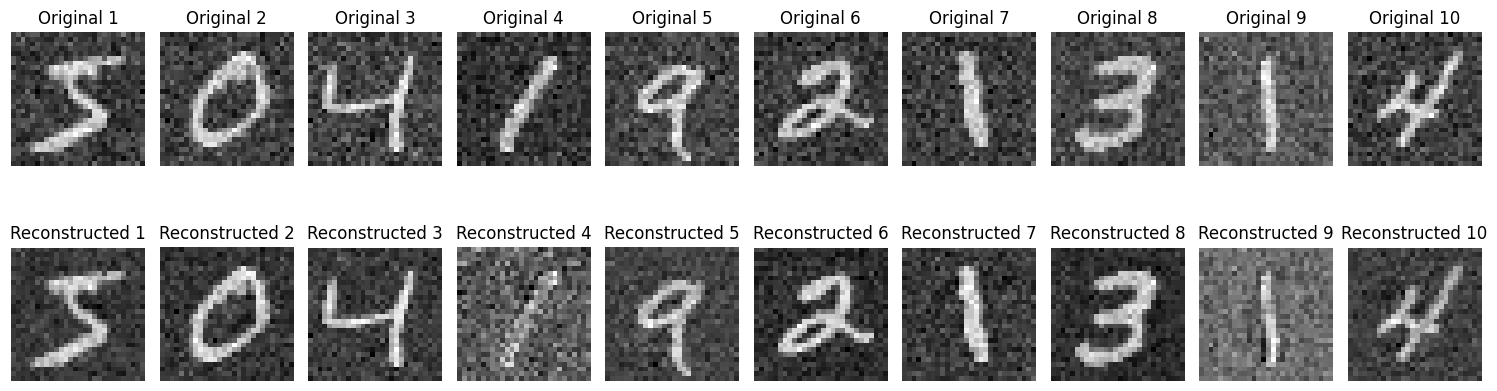

In [64]:
# plot x & x_recon for mnist in 2 row, take 5 images, remember to reshape to image

n_images = 10
fig, axs = plt.subplots(2, n_images, figsize=(15, 5))
for i in range(n_images):
    axs[0, i].imshow(X[i].reshape(original_shape[2:]), cmap='gray')
    axs[0, i].axis('off')
    axs[0, i].set_title(f'Original {i+1}')

    axs[1, i].imshow(x_recon[i].reshape(original_shape[2:]), cmap='gray')
    axs[1, i].axis('off')
    axs[1, i].set_title(f'Reconstructed {i+1}')
plt.tight_layout()
plt.show()